<a href="https://colab.research.google.com/github/MalwareX95/Pytorch---Deep-learning-w-Python/blob/main/pytorch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2020-10-31 10:04:42--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.68.33, 2600:1402:6800:297::e59, 2600:1402:6800:283::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.36.68.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   151MB/s    in 5.1s    

2020-10-31 10:04:47 (154 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [2]:
import zipfile

with zipfile.ZipFile('kagglecatsanddogs_3367a.zip', 'r') as zip_ref:
    zip_ref.extractall('kagglecatsanddogs')

In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm


REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()



training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

  0%|          | 40/12501 [00:00<00:31, 397.44it/s]

PetImages/Cat


  1%|          | 71/12501 [00:00<00:17, 695.13it/s]

PetImages/Dog


100%|██████████| 12501/12501 [00:16<00:00, 747.88it/s]


Cats: 12476
Dogs: 12470
24946


In [13]:
import torch

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

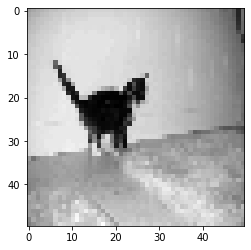

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")